<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description-des-données" data-toc-modified-id="Description-des-données-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Description des données</a></span><ul class="toc-item"><li><span><a href="#Lecture-des-données" data-toc-modified-id="Lecture-des-données-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Lecture des données</a></span></li><li><span><a href="#Informations-sur-les-donéees" data-toc-modified-id="Informations-sur-les-donéees-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Informations sur les donéees</a></span><ul class="toc-item"><li><span><a href="#structure-de-données" data-toc-modified-id="structure-de-données-1.1.2.1"><span class="toc-item-num">1.1.2.1&nbsp;&nbsp;</span>structure de données</a></span></li></ul></li><li><span><a href="#Informations-sur-les-données-manquantes" data-toc-modified-id="Informations-sur-les-données-manquantes-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Informations sur les données manquantes</a></span></li></ul></li><li><span><a href="#Merge-&amp;-aggrégations" data-toc-modified-id="Merge-&amp;-aggrégations-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Merge &amp; aggrégations</a></span><ul class="toc-item"><li><span><a href="#test-de-quelques-fonctions" data-toc-modified-id="test-de-quelques-fonctions-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>test de quelques fonctions</a></span></li><li><span><a href="#Merge-des-datasets-Pos_cash_Balance-et-Previous_application" data-toc-modified-id="Merge-des-datasets-Pos_cash_Balance-et-Previous_application-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Merge des datasets Pos_cash_Balance et Previous_application</a></span></li><li><span><a href="#Merges-des-datasets-Installements-payments-et-previous-application" data-toc-modified-id="Merges-des-datasets-Installements-payments-et-previous-application-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Merges des datasets Installements payments et previous application</a></span></li><li><span><a href="#Merge-des-datasets--Credit_card_balance-et-previous-application" data-toc-modified-id="Merge-des-datasets--Credit_card_balance-et-previous-application-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Merge des datasets  Credit_card_balance et previous application</a></span></li><li><span><a href="#Merge-des-datasets--Bureau-et-Bureau-Balance" data-toc-modified-id="Merge-des-datasets--Bureau-et-Bureau-Balance-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Merge des datasets  Bureau et Bureau Balance</a></span></li><li><span><a href="#merge-de-bureau-avec-application-train/test" data-toc-modified-id="merge-de-bureau-avec-application-train/test-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>merge de bureau avec application train/test</a></span></li></ul></li><li><span><a href="#merge-de-previous-application-avec-application-train/test" data-toc-modified-id="merge-de-previous-application-avec-application-train/test-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>merge de previous application avec application train/test</a></span></li><li><span><a href="#Save_data" data-toc-modified-id="Save_data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Save_data</a></span></li></ul></div>

# Projet 7 :  Implémentez un modèle de scoring: Analyse exploratoire

L'objectif est de développer un modèle de scoring de la probabilité de défaut de paiement d'un client pour étayer la décision d'accorder ou non un prêt à un client potentiel en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, ...). CDans le notebook, vous trouverez des informations sur les différents ensembles de données ainsi qu'une explication détaillée de la procédure de concaténation utilisée.


In [1]:
from datetime import timedelta, datetime, tzinfo, timezone
from urllib import request
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot, transforms
import seaborn as sns
import numpy as np
import re

import IPython.display

import warnings
warnings.filterwarnings('ignore')
sns.set()

## Description des données

### Lecture des données 

Les données sont plusieurs fichiers '.csv' qui renseignent des informations concernant les clients d'une banque.

Le fichier 'application_train' donne de multiples informations sur des clients qui ont effectué un emprunt ainsi que la mention remboursé ou défaut de payement sur cet emprunt.

Le fichier application_test renseigne exactement les mêmes informations que le fichier 'application_train', mais il s'agit de déterminer la probabilité de défaut de paiement pour ces nouveaux emprunts.

Quant aux autres fichiers il s'agit d'informations relatives à des emprunts antérieurs qui ont été accordés soit par d'autres institutions soit par la même banque.

L'organigramme ci-dessous présente l'ensemble des fichiers à notre disposition, leur contenu ansi que les liens qui les relient

In [2]:
file_path = '/Users/admin/Desktop/formation_data_Scientist/projet7/Donnees/' 

In [3]:
application_test = pd.read_csv(file_path + 'application_test.csv')
application_train = pd.read_csv(file_path + 'application_train.csv')
bureau_balance = pd.read_csv(file_path + 'bureau_balance.csv')
bureau = pd.read_csv(file_path + 'bureau.csv')
credit_card_balance = pd.read_csv(file_path + 'credit_card_balance.csv')
#HomeCredit_columns_description = pd.read_csv(file_path + 'HomeCredit_columns_description.csv')
installments_payments = pd.read_csv(file_path + 'installments_payments.csv')
POS_CASH_balance = pd.read_csv(file_path + 'POS_CASH_balance.csv')
previous_application = pd.read_csv(file_path + 'previous_application.csv')
sample_submission = pd.read_csv(file_path + 'sample_submission.csv')

In [4]:
application_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [5]:
from IPython.display import display, Image
path = '/Users/admin/Desktop/liaison.png'
display(Image(path, filename=path))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/admin/Desktop/liaison.png'

### Informations sur les donéees 

#### structure de données 

In [7]:
dict_df = {'application_test':application_test, 
'application_train':application_train,
'bureau_balance': bureau_balance,
'credit_card_balance': credit_card_balance,
'installments_payments':  installments_payments,
'POS_CASH_balance': POS_CASH_balance, 
'previous_application': previous_application,
'sample_submission': sample_submission}

In [8]:
df_info = pd.DataFrame({})  
list_col_with_NaN = []  
for cle, value in dict_df.items():
    df_info.loc[cle, 'df'] = cle
    df_info.loc[cle, 'nombre de lignes'] = (value.shape[0])
    df_info.loc[cle,'nombre columns'] = value.shape[1]  
    df_info.loc[cle,'% Columns Name'] =   ' ,'.join(list(value.columns))
    df_info.loc[cle, 'duplicated'] = value.duplicated().sum()
    df_info.loc[cle,'% NaN'] = value.isna().sum(axis = 0).sum()/len(value)/len(value.columns)*100
    for col in value.columns:
        if value[col].isna().sum()!=0:
            list_col_with_NaN.append(col)
            df_info.loc[cle,'Name Columns with NaN'] =' ,'.join((list(list_col_with_NaN)))
            
    list_col_with_NaN = []
df_info = df_info.reset_index().drop('index', axis = 1)

In [9]:
display(df_info)

,df,nombre de lignes,nombre columns,% Columns Name,duplicated,% NaN,Name Columns with NaN
0,application_test,48744.0,121.0,"SK_ID_CURR ,NAME_CONTRACT_TYPE ,CODE_GENDER ,F...",0.0,23.811687,"AMT_ANNUITY ,NAME_TYPE_SUITE ,OWN_CAR_AGE ,OCC..."
1,application_train,307511.0,122.0,"SK_ID_CURR ,TARGET ,NAME_CONTRACT_TYPE ,CODE_G...",0.0,24.395942,"AMT_ANNUITY ,AMT_GOODS_PRICE ,NAME_TYPE_SUITE ..."
2,bureau_balance,27299925.0,3.0,"SK_ID_BUREAU ,MONTHS_BALANCE ,STATUS",0.0,0.000000,NaN
3,credit_card_balance,3840312.0,23.0,"SK_ID_PREV ,SK_ID_CURR ,MONTHS_BALANCE ,AMT_BA...",0.0,6.654074,"AMT_DRAWINGS_ATM_CURRENT ,AMT_DRAWINGS_OTHER_C..."
4,installments_payments,13605401.0,8.0,"SK_ID_PREV ,SK_ID_CURR ,NUM_INSTALMENT_VERSION...",0.0,0.005338,"DAYS_ENTRY_PAYMENT ,AMT_PAYMENT"
5,POS_CASH_balance,10001358.0,8.0,"SK_ID_PREV ,SK_ID_CURR ,MONTHS_BALANCE ,CNT_IN...",0.0,0.065189,"CNT_INSTALMENT ,CNT_INSTALMENT_FUTURE"
6,previous_application,1670214.0,37.0,"SK_ID_PREV ,SK_ID_CURR ,NAME_CONTRACT_TYPE ,AM...",0.0,17.976877,"AMT_ANNUITY ,AMT_CREDIT ,AMT_DOWN_PAYMENT ,AMT..."
7,sample_submission,48744.0,2.0,"SK_ID_CURR ,TARGET",0.0,0.000000,NaN


### Informations sur les données manquantes 

In [10]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [11]:
df_missing = pd.DataFrame()
for n_df, df in dict_df.items():
    print(n_df)
    display(missing_data(df).head(10))

application_test


,Total,Percent
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
COMMONAREA_MEDI,33495,68.716150
NONLIVINGAPARTMENTS_AVG,33347,68.412523
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MODE,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302


application_train


,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


bureau_balance


,Total,Percent
SK_ID_BUREAU,0,0.0
MONTHS_BALANCE,0,0.0
STATUS,0,0.0


credit_card_balance


,Total,Percent
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208
AMT_INST_MIN_REGULARITY,305236,7.948208
SK_ID_PREV,0,0.000000


installments_payments


,Total,Percent
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_PAYMENT,2905,0.021352
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
NUM_INSTALMENT_VERSION,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000
DAYS_INSTALMENT,0,0.000000
AMT_INSTALMENT,0,0.000000


POS_CASH_balance


,Total,Percent
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
MONTHS_BALANCE,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000
SK_DPD,0,0.000000
SK_DPD_DEF,0,0.000000


previous_application


,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
AMT_DOWN_PAYMENT,895844,53.636480
RATE_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_TERMINATION,673065,40.298129
DAYS_LAST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129


sample_submission


,Total,Percent
SK_ID_CURR,0,0.0
TARGET,0,0.0


In [12]:
#for c in dict_df['application_train'].columns:
   # c_train = set(dict_df['application_train'][c].unique())
    #c_test = set(dict_df['application_test'][c].unique())
    #diff = c_train ^ c_test

## Merge & aggrégations

In [13]:
# La fonction ce dessous permettant l'affichage de la matrice de corrélation pour un datatset 
def mat_corr(df, size_x, size_y):  
    corr_matrix = df.select_dtypes(include = ['int', 'float']).corr()
    mask = np.triu(corr_matrix)
    plt.figure(figsize=(size_x,size_y))
    sns.heatmap(corr_matrix, cmap="coolwarm", mask=mask, linewidths=.5, annot=True, cbar=True, square=True)
    plt.title("Matrice de corrélation des variables quantitatives")
#plt.savefig("Présentation/Images/matrice_corr.png")
    plt.show()
    return plt.show()


### test de quelques fonctions

In [14]:
#ce script permet de tester la fonction get_dummies
data = {'city': ['Paris', 'New York', 'London', 'Paris', 'London', 'New York'], 
        'month': ['Jan', 'Feb', 'Mar', 'Mar', 'Jan', 'Feb'],
        'value': [10, 20, 30, 40, 50, 60]}

df = pd.DataFrame(data)
pd.get_dummies(df, columns=['city', 'month'])

,value,city_London,city_New York,city_Paris,month_Feb,month_Jan,month_Mar
0,10,0,0,1,0,1,0
1,20,0,1,0,1,0,0
2,30,1,0,0,0,0,1
3,40,0,0,1,0,0,1
4,50,1,0,0,0,1,0
5,60,0,1,0,1,0,0


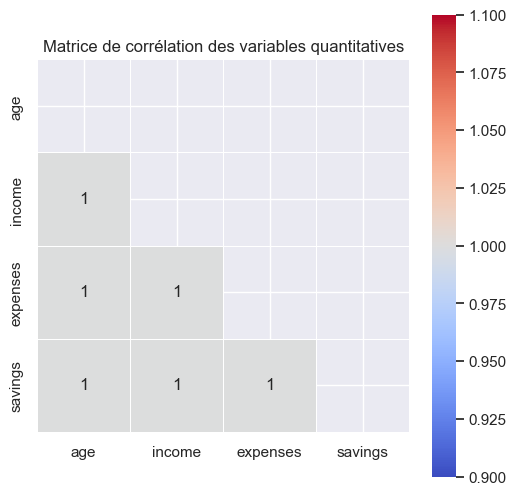

In [15]:
"le dataframe ci dessous a été crée a pour but de tester la fonctionmat_corr"
data = {'age': [25, 30, 35, 40, 45], 
        'income': [40000, 50000, 60000, 70000, 80000],
        'expenses': [20000, 25000, 30000, 35000, 40000],
        'savings': [20000, 25000, 30000, 35000, 40000]}

df = pd.DataFrame(data)
mat_corr(df, 6, 6)

In [16]:
#ce script permet de tester la fonction agg()
data = {'city': ['Paris', 'New York', 'London', 'Paris', 'London', 'New York'], 
        'month': ['Jan', 'Feb', 'Mar', 'Mar', 'Jan', 'Feb'],
        'value1': [10, 20, 30, 40, 50, 60],
        'value2': [100, 200, 300, 400, 500, 600]}

df = pd.DataFrame(data)
df.groupby(['city', 'month']).agg({'value1': ['sum', 'mean', 'max'],
                                            'value2': ['sum', 'mean', 'max']})

value1           value2            
                  sum  mean max    sum   mean  max
city     month                                    
London   Jan       50  50.0  50    500  500.0  500
         Mar       30  30.0  30    300  300.0  300
New York Feb       80  40.0  60    800  400.0  600
Paris    Jan       10  10.0  10    100  100.0  100
         Mar       40  40.0  40    400  400.0  400

### Merge des datasets Pos_cash_Balance et Previous_application

In [17]:
POS_CASH_balance_agg = POS_CASH_balance.copy()
previous_application_agg = previous_application.copy()

In [18]:
POS_CASH_balance_agg['NAME_CONTRACT_STATUS'].unique()

array(['Active', 'Completed', 'Signed', 'Approved',
       'Returned to the store', 'Demand', 'Canceled', 'XNA',
       'Amortized debt'], dtype=object)

In [ ]:
POS_CASH_balance_agg

In [ ]:
#previous_application_agg[['NAME_CONTRACT_STATUS', 'NAME_CONTRACT_STATUS1']]

In [ ]:
previous_application_agg[previous_application_agg['SK_ID_CURR'] == 174278]['NAME_CONTRACT_STATUS']

In [ ]:
#POS_CASH_balance_agg[POS_CASH_balance_agg['SK_ID_CURR'] == 174278]['NAME_CONTRACT_STATUS']

In [ ]:
previous_application_agg[['NAME_CONTRACT_STATUS', 'SK_ID_CURR']]

In [ ]:
'''
L'observation'XNA' n'existe pas dans le dataset application test, 
pour cela je vais la remplacer par Na et l'imputer par la suite'''

previous_application_agg['NAME_CONTRACT_STATUS1'] = \
                POS_CASH_balance_agg['NAME_CONTRACT_STATUS']\
                            .map(lambda x: x if x != 'XNA' else np.nan)
POS_CASH_balance_agg['NAME_CONTRACT_STATUS'] = \
                POS_CASH_balance_agg['NAME_CONTRACT_STATUS']\
                            .map(lambda x: x if x != 'XNA' else np.nan)

In [ ]:
POS_CASH_balance_agg = pd.get_dummies(POS_CASH_balance_agg,
                                         prefix='N_C_STATUS',
                                         columns=['NAME_CONTRACT_STATUS'])


In [ ]:
# aggregate along 'SK_ID_PREV'
def abs_min(x): return np.abs(np.min(x))

dic_agg = {'MONTHS_BALANCE': [abs_min], #SOLDE MENSUEL
          'CNT_INSTALMENT': ['max'], # nb of changes in the instalment parameters
          'CNT_INSTALMENT_FUTURE': ['max'], # maximum number of instalments 
          'N_C_STATUS_Active': ['sum'],
          'N_C_STATUS_Completed': ['sum'],
          'N_C_STATUS_Signed': ['sum'],
          'N_C_STATUS_Demand': ['sum'],
          'N_C_STATUS_Returned to the store': ['sum'],
          'N_C_STATUS_Approved': ['sum'],
          'N_C_STATUS_Amortized debt': ['sum'],
          'N_C_STATUS_Canceled': ['sum'],
          'SK_DPD': ['mean'], # days past due
          'SK_DPD_DEF': ['mean'], # days past due with tolerance
          }

POS_CASH_balance_agg= \
           POS_CASH_balance_agg.groupby('SK_ID_PREV').agg(dic_agg)

In [ ]:
# flatten two levels columns indices
POS_CASH_balance_agg.columns = ['__'.join(tup).strip() \
                             for tup in POS_CASH_balance_agg.columns.values]

In [ ]:
POS_CASH_balance_agg.columns

In [ ]:
POS_CASH_balance_agg.columns = ['PrLCash_'+col if col not in ['SK_ID_BUREAU',
                                                  'SK_ID_CURR'] \
                                  else col for col in POS_CASH_balance_agg.columns]

In [ ]:
mat_corr(POS_CASH_balance_agg, 12, 12)

In [ ]:
POS_CASH_balance_agg = POS_CASH_balance_agg.drop('PrLCash_CNT_INSTALMENT_FUTURE__max', axis = 1)

In [ ]:
previous_application_agg = pd.merge(previous_application_agg, POS_CASH_balance_agg.reset_index(),
                                                how='left',
                                                on='SK_ID_PREV')

In [ ]:
previous_application_agg

### Merges des datasets Installements payments et previous application

In [ ]:
inst_Payments_agg = installments_payments.copy()

In [ ]:
inst_Payments_agg

In [ ]:
corr_matrix = inst_Payments_agg.select_dtypes(include = ['int', 'float']).corr()
mask = np.triu(corr_matrix)
plt.figure(figsize=(18,14))
sns.heatmap(corr_matrix, cmap="coolwarm", mask=mask, linewidths=.5, annot=True, cbar=True, square=True)
plt.title("Matrice de corrélation des variables quantitatives")
#plt.savefig("Présentation/Images/matrice_corr.png")
plt.show()

In [ ]:
# Percentage and difference paid in each installment (amount paid and installment value)
inst_Payments_agg['PAYMENT_PERC'] = inst_Payments_agg['AMT_PAYMENT'] / inst_Payments_agg['AMT_INSTALMENT']
inst_Payments_agg['PAYMENT_DIFF'] = inst_Payments_agg['AMT_INSTALMENT'] - inst_Payments_agg['AMT_PAYMENT']

dic_installements = {
    'NUM_INSTALMENT_VERSION': ['nunique'],
    'NUM_INSTALMENT_NUMBER': ['max'],
    'DAYS_INSTALMENT': ['max', 'mean'],
    'DAYS_ENTRY_PAYMENT': ['max', 'mean'],
    'AMT_INSTALMENT': ['max', 'mean'],
    'AMT_PAYMENT': ['min', 'max', 'mean'],
    'PAYMENT_PERC': ['max', 'mean', 'sum'],
    'PAYMENT_DIFF': ['max', 'mean']}


inst_Payments_agg = inst_Payments_agg.groupby('SK_ID_PREV').agg(dic_installements)
#inst_Payments_agg.columns = pd.Index(['INS_' + e[0] + "_" + e[1].upper() for e in inst_Payments_agg.columns.tolist()])
# Count installments accounts
#inst_Payments_agg['INS_COUNT'] = inst_Payments_agg.groupby('SK_ID_PREV').size()

#inst_Payments_agg.reset_index(inplace = True)
#del inst_Payments_agg



print("INSTALLMENTS PAYMENTS SHAPE:", inst_Payments_agg.shape, "\n")

inst_Payments_agg.head()

In [ ]:
inst_Payments_agg

In [ ]:
inst_Payments_agg.columns = ['__'.join(tup).strip() \
                             for tup in inst_Payments_agg.columns.values if tup != ['index' , 'SK_ID_PREV']]

In [ ]:
inst_Payments_agg 

In [ ]:
inst_Payments_agg.columns 

In [ ]:
mat_corr(inst_Payments_agg, 12, 12)

In [ ]:
cols_to_drop_inst_pay = ['DAYS_INSTALMENT__mean', 'DAYS_ENTRY_PAYMENT__max', 'DAYS_ENTRY_PAYMENT__mean',
                 'AMT_PAYMENT__min', 'AMT_PAYMENT__mean', 'PAYMENT_PERC__mean', 'PAYMENT_PERC__sum']

In [ ]:
inst_Payments_agg = inst_Payments_agg.drop(cols_to_drop_inst_pay, axis = 1)

In [ ]:
inst_Payments_agg.columns = ['inst_Payments_' + col if col not in ['SK_ID_PREV',
                                                  'SK_ID_PREV'] \
                                  else col for col in inst_Payments_agg.columns ]

In [ ]:
inst_Payments_agg.columns

In [ ]:
previous_application_agg = pd.merge(previous_application_agg, inst_Payments_agg.reset_index(),
                                                how='left',
                                                on='SK_ID_PREV')

In [ ]:
previous_application_agg

### Merge des datasets  Credit_card_balance et previous application

In [ ]:
credit_card_balance_agg = credit_card_balance.copy()

In [ ]:
credit_card_balance_agg

In [ ]:
mat_corr(credit_card_balance_agg, 12, 12)

In [ ]:
#Supprimer les variables redondantes
credit_card_balance_agg = credit_card_balance.drop(columns=['AMT_PAYMENT_CURRENT',
                   'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
                   'CNT_DRAWINGS_ATM_CURRENT','CNT_DRAWINGS_POS_CURRENT',
                   'CNT_DRAWINGS_OTHER_CURRENT','AMT_DRAWINGS_ATM_CURRENT',
                   'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT'
                   ])

In [ ]:
credit_card_balance_agg

In [ ]:
credit_card_balance_agg['NAME_CONTRACT_STATUS'].unique()

In [ ]:
credit_card_balance_agg = pd.get_dummies(credit_card_balance_agg,
                                      prefix='N_C_STATUS',
                                      columns=['NAME_CONTRACT_STATUS'])

In [ ]:
ind = credit_card_balance_agg.groupby('SK_ID_PREV')['MONTHS_BALANCE'].idxmax()

In [ ]:
ind

In [ ]:
# find the AMT_CREDIT_LIMIT for the last month (to merge to the aggregated dataframe later)
ind = credit_card_balance_agg.groupby('SK_ID_PREV')['MONTHS_BALANCE'].idxmax()# renvoie le solde mensuel max du dernier mois
ser_last_AMT_CREDIT_LIMIT_ACTUAL = credit_card_balance_agg.loc[ind, ['SK_ID_PREV',
                                                                  'AMT_CREDIT_LIMIT_ACTUAL']]
ser_last_AMT_CREDIT_LIMIT_ACTUAL = \
                    ser_last_AMT_CREDIT_LIMIT_ACTUAL.set_index('SK_ID_PREV')
ser_last_AMT_CREDIT_LIMIT_ACTUAL.columns = ['AMT_CREDIT_LIMIT_ACTUAL_last']

In [ ]:
#ind

In [ ]:
credit_card_balance_agg

In [ ]:
dicc_agg_card = {
          'MONTHS_BALANCE': [abs_min, 'size'],
          'AMT_BALANCE': ['max', 'mean'],
          'AMT_CREDIT_LIMIT_ACTUAL': ['mean'],
          'AMT_DRAWINGS_CURRENT': ['mean'],
          'AMT_INST_MIN_REGULARITY': ['mean'],
          'AMT_PAYMENT_TOTAL_CURRENT': ['max', 'mean'],
          'AMT_TOTAL_RECEIVABLE': ['max', 'mean'],
          'CNT_DRAWINGS_CURRENT': ['max', 'mean'],
          'CNT_INSTALMENT_MATURE_CUM': ['max'], # nb of paid installments 
          'N_C_STATUS_Active': ['sum'],
          'N_C_STATUS_Completed': ['sum'],
          'N_C_STATUS_Signed': ['sum'],
          'N_C_STATUS_Demand': ['sum'],
          'N_C_STATUS_Refused': ['sum'],
          'N_C_STATUS_Approved': ['sum'],   
          'N_C_STATUS_Sent proposal': ['sum'],
    
###Attention A changer_---------         
        'SK_DPD': ['max'], # days past due Attention prendre le maximum( le nombre de jour maximale de retard)
          'SK_DPD_DEF': ['max'],} # days past due Attention prendre le maximum( le nombre de jour maximale de retard)

In [ ]:
credit_card_balance_agg= \
           credit_card_balance_agg.groupby('SK_ID_PREV').agg(dicc_agg_card)

In [ ]:
credit_card_balance_agg

In [ ]:
credit_card_balance_agg.columns = ['__'.join(tup).strip() \
                             for tup in credit_card_balance_agg.columns.values]

In [ ]:
mat_corr(credit_card_balance_agg, 12, 12)

In [ ]:
cols_drop_CCb = ['MONTHS_BALANCE__size', 'AMT_TOTAL_RECEIVABLE__max', 'AMT_TOTAL_RECEIVABLE__mean',
              'CNT_DRAWINGS_CURRENT__mean', 'AMT_BALANCE__max', 'CNT_DRAWINGS_CURRENT__mean', 'AMT_DRAWINGS_CURRENT__mean']

In [ ]:
credit_card_balance_agg.columns

In [ ]:
credit_card_balance_agg = credit_card_balance_agg.drop(cols_drop_CCb, axis = 1)

In [ ]:
credit_card_balance_agg

In [ ]:
credit_card_balance_agg = \
                    credit_card_balance_agg.merge(ser_last_AMT_CREDIT_LIMIT_ACTUAL,
                                               'left', on='SK_ID_PREV')

In [ ]:
credit_card_balance_agg.columns = ['PrLC_'+col if col not in ['SK_ID_PREV'] \
                            else col for col in credit_card_balance_agg.columns]

In [ ]:
previous_application_agg = pd.merge(previous_application_agg, credit_card_balance_agg.reset_index(),
                                                how='left',
                                                on='SK_ID_PREV')

In [ ]:
#previous_application_agg['PrLC_N_C_STATUS_Completed__sum'].unique()

In [ ]:
#credit_card_balance_agg = credit_card_balance.drop(columns=['AMT_PAYMENT_CURRENT',
                  #'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
                  # 'CNT_DRAWINGS_ATM_CURRENT','CNT_DRAWINGS_POS_CURRENT',
                  # 'CNT_DRAWINGS_OTHER_CURRENT','AMT_DRAWINGS_ATM_CURRENT',
                   #'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT'
                  # ])

In [ ]:
#def one_hot_encoder(df, nan_as_category=True):
    #'''One-hot encoding for categorical columns with get_dummies'''
    #original_columns = list(df.columns)
    #categorical_columns = df.select_dtypes(["category", "object"]).columns.tolist()
    # categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    #df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    #new_columns = [c for c in df.columns if c not in original_columns]
    #return df, new_columns


### Merge des datasets  Bureau et Bureau Balance

In [ ]:
bureau_balance_agg = bureau_balance.copy()

In [ ]:
bureau_balance_agg 

In [ ]:
#bureau_balance_agg.groupby('STATUTS')[]

In [ ]:
bureau_balance_agg['STATUS'].value_counts()

In [ ]:
# Change 0 to 'N' in STATUS
bureau_balance_agg.loc[:,'STATUS'] = \
   bureau_balance_agg.loc[:,'STATUS'].replace({'0': 'N'})


In [ ]:
bureau_balance_agg = pd.get_dummies(bureau_balance_agg,
                                      prefix='STATUS',
                                      columns=['STATUS'])

In [ ]:
#H = list(bureau_balance_agg.loc[:, 'STATUS_1':].columns)
#print(H)#

In [ ]:
dict_bureau_balance = {'STATUS_1': ['max', 'mean'], 'STATUS_2': ['max', 'mean'],
                        'STATUS_3':['max', 'mean'],'STATUS_4': ['max', 'mean'],
                        'STATUS_5':  ['max', 'mean'],'STATUS_C': ['max', 'mean'],
                        'STATUS_N': ['max', 'mean'],'STATUS_X':['max', 'mean'], 'MONTHS_BALANCE':'mean'}
    

In [ ]:
bureau_balance_agg = bureau_balance_agg.groupby('SK_ID_BUREAU').agg(dict_bureau_balance)

In [ ]:
bureau_balance_agg

In [ ]:
#bureau_balance_agg = bureau_balance_agg.reset_index()

In [ ]:
bureau_balance_agg.columns = ['__'.join(tup).strip() \
                             for tup in bureau_balance_agg.columns.values]

In [ ]:
mat_corr(bureau_balance_agg, 12, 12)

In [ ]:
bureau_balance_agg

In [ ]:
#bureau_balance_agg = bureau_balance_agg.reset_index()

In [ ]:
bureau_balance_agg.columns = ['bb_agg_'+ col if col not in ['SK_ID_BUREAU'] \
                            else col for col in bureau_balance_agg.columns]

In [ ]:
bureau_balance_agg

In [ ]:
bureau.agg = bureau.copy()

In [ ]:
bureau.agg 

In [ ]:
bureau.agg = pd.merge(bureau.agg, bureau_balance_agg.reset_index(),
                                      how='left',
                                      on='SK_ID_BUREAU')

In [ ]:
bureau.agg

In [ ]:
bureau.agg = bureau.agg.drop('CREDIT_CURRENCY', axis =1)

In [ ]:
bureau.agg = pd.get_dummies(bureau.agg,
                                prefix='CREDIT_TYPE',
                                columns=['CREDIT_TYPE'])
bureau.agg = pd.get_dummies(bureau.agg,
                                prefix='CREDIT_ACTIVE',
                                columns=['CREDIT_ACTIVE'])

In [ ]:
bureau.agg.columns

In [ ]:
dict_bureau = {'DAYS_CREDIT': [abs_min],
          'CREDIT_DAY_OVERDUE': ['sum','max'], # days past due
          'DAYS_CREDIT_ENDDATE': ['max'], # max remaining duration of credit
          'DAYS_ENDDATE_FACT': ['min'], # delay since last
          'AMT_CREDIT_MAX_OVERDUE': ['mean', 'max'], # max amount overdue
          'CNT_CREDIT_PROLONG': ['mean'], # nb of times credit was prolongated
          'AMT_CREDIT_SUM': ['mean', 'sum'],
          'AMT_CREDIT_SUM_DEBT': ['sum'],
          'AMT_CREDIT_SUM_LIMIT': ['sum'],
          'AMT_CREDIT_SUM_OVERDUE': ['sum'],
          'AMT_ANNUITY': ['mean'],
          'bb_agg_STATUS_1__max': ['max'],
          'bb_agg_STATUS_1__mean': ['mean'],
          'bb_agg_STATUS_2__max': ['max'],
          'bb_agg_STATUS_2__mean': ['mean'],
          'bb_agg_STATUS_3__max': ['max'],
          'bb_agg_STATUS_3__mean': ['mean'],
          'bb_agg_STATUS_4__max': ['max'],
          'bb_agg_STATUS_4__mean': ['mean'],
          'bb_agg_STATUS_5__max': ['max'],
          'bb_agg_STATUS_5__mean': ['mean'],
          'bb_agg_STATUS_C__max': ['max'],
          'bb_agg_STATUS_C__mean': ['mean'],
          'bb_agg_STATUS_N__max': ['max'],
          'bb_agg_STATUS_N__mean': ['mean'],
          'bb_agg_STATUS_X__max': ['max'],
          'bb_agg_STATUS_X__mean': ['mean'],
          'bb_agg_MONTHS_BALANCE__mean': ['mean'], # nb of month (total duration) of the contract		
          'CREDIT_TYPE_Another type of loan': ['sum'],
        'CREDIT_TYPE_Car loan': ['sum'], 
        'CREDIT_TYPE_Cash loan (non-earmarked)': ['sum'],
        'CREDIT_TYPE_Consumer credit': ['sum'], 
        'CREDIT_TYPE_Credit card': ['sum'],
       'CREDIT_TYPE_Interbank credit': ['sum'],
       'CREDIT_TYPE_Loan for business development': ['sum'],
       'CREDIT_TYPE_Loan for purchase of shares (margin lending)': ['sum'],
       'CREDIT_TYPE_Loan for the purchase of equipment': ['sum'],
       'CREDIT_TYPE_Loan for working capital replenishment': ['sum'],
       'CREDIT_TYPE_Microloan': ['sum'] , 'CREDIT_TYPE_Mobile operator loan': ['sum'],
       'CREDIT_TYPE_Mortgage': ['sum'], 'CREDIT_TYPE_Real estate loan': ['sum'],
       'CREDIT_TYPE_Unknown type of loan': ['sum'], 'CREDIT_ACTIVE_Active': ['sum'],
       'CREDIT_ACTIVE_Bad debt': ['sum'], 'CREDIT_ACTIVE_Closed': ['sum'], 'CREDIT_ACTIVE_Sold': ['sum']}

In [ ]:
bureau.agg = \
            bureau.agg.groupby('SK_ID_CURR').agg(dict_bureau)

In [ ]:
bureau.agg

In [ ]:
bureau.agg.columns = ['__'.join(tup).strip() \
                             for tup in bureau.agg.columns.values]

In [ ]:
mat_corr(bureau.agg, 16, 16)

In [ ]:
#bureau.agg = bureau.agg.reset_index()

In [ ]:
cols_bureau_to_drop = ['CNT_CREDIT_PROLONG__mean', 'DAYS_CREDIT_ENDDATE__max']

In [ ]:
#bureau.agg = bureau.agg.drop(cols_bureau_to_drop, axis = 1)

In [ ]:
bureau.agg.columns = ['Bureau_'+ col if col not in ['SK_ID_BUREAU'] \
                            else col for col in bureau.agg.columns]

In [ ]:
bureau.agg

### merge de bureau avec application train/test

In [ ]:
application_train.agg = application_train.copy()
application_test.agg = application_test.copy()

In [ ]:
bureau.agg

In [ ]:
application_train.agg = pd.merge(application_train.agg, bureau.agg.reset_index(),
                                                how='left',
                                                on='SK_ID_CURR')
application_test.agg  = pd.merge(application_test.agg, bureau.agg.reset_index(),
                                                how='left',
                                                on='SK_ID_CURR')

In [ ]:
application_train.agg

In [ ]:
application_train

In [ ]:
previous_application_agg

## merge de previous application avec application train/test

In [ ]:
previous_application_agg_1 = previous_application_agg.copy()

Previous_Application____train/test_data

In [ ]:
previous_application_agg_1

In [ ]:
useless_cols = [  'NAME_CONTRACT_STATUS1',                  
                  'WEEKDAY_APPR_PROCESS_START',
                  'FLAG_LAST_APPL_PER_CONTRACT',
                  'NFLAG_LAST_APPL_IN_DAY',
                  'NAME_TYPE_SUITE',
                  'NAME_SELLER_INDUSTRY',
                  'NAME_YIELD_GROUP',
                  'CHANNEL_TYPE',
                  'NAME_CLIENT_TYPE',
                  'NAME_PRODUCT_TYPE',
                  'SELLERPLACE_AREA',
                  'NAME_GOODS_CATEGORY',
                  'HOUR_APPR_PROCESS_START',
                  'NAME_CASH_LOAN_PURPOSE',
                  'DAYS_FIRST_DRAWING',
                  'AMT_GOODS_PRICE',
                  'CODE_REJECT_REASON',
                  'PRODUCT_COMBINATION',
                  'NFLAG_INSURED_ON_APPROVAL'
                  ]

previous_application_agg_1 = previous_application_agg_1.drop(columns=useless_cols)

In [ ]:
mat_corr(previous_application_agg_1, 16, 16)

In [ ]:
cat_cols = previous_application_agg_1.select_dtypes(include='object').columns
for col in cat_cols:
    previous_application_agg_1[col] = \
                    previous_application_agg_1[col]\
                                .map(lambda x: x if x != 'XNA' else np.nan)

In [ ]:
previous_application_agg_1.select_dtypes(include='object')

In [ ]:
previous_application_agg_1 = pd.get_dummies(previous_application_agg_1,
                                prefix='NAME_CONTRACT_TYPE',
                                columns=['NAME_CONTRACT_TYPE'])

In [ ]:
previous_application_agg_1 = pd.get_dummies(previous_application_agg_1,
                                prefix='NAME_CONTRACT_STATUS',
                                columns=['NAME_CONTRACT_STATUS'])

In [ ]:
previous_application_agg_1 = pd.get_dummies(previous_application_agg_1,
                                prefix='NAME_PAYMENT_TYPE',
                                columns=['NAME_PAYMENT_TYPE'])

In [ ]:
previous_application_agg_1 = pd.get_dummies(previous_application_agg_1,
                                prefix='NAME_PORTFOLIO',
                                columns=['NAME_PORTFOLIO'])

In [ ]:
# initial duration and effective duration of the loan

previous_application_agg_1 = \
   previous_application_agg_1.assign(DAYS_TOT_DURATION_INIT = \
                                lambda x: x['DAYS_LAST_DUE_1ST_VERSION'] - \
                                                        x['DAYS_FIRST_DUE'],
                                                          DAYS_TOT_DURATION = \
                                lambda x: x['DAYS_TERMINATION'] - \
                                                    x['DAYS_FIRST_DUE'])

In [ ]:
# nb of days the contract has been prolongated

previous_application_agg_1 = \
    previous_application_agg_1.assign(DAYS_PROLONG_PCT = \
                    lambda x: 100*(x['DAYS_TOT_DURATION_INIT'] - \
                                        x['DAYS_TOT_DURATION'])/ \
                                    x['DAYS_TOT_DURATION_INIT'])

In [ ]:
# difference between obtained and asked amount
previous_application_agg_1 = \
   previous_application_agg_1.assign(AMT_DIFF_PCT = \
                        lambda x: 100*(x['AMT_CREDIT'] - x['AMT_APPLICATION']) / \
                                x['AMT_APPLICATION'])

In [ ]:
# obtained amount per month of contract 
previous_application_agg_1 = \
    previous_application_agg_1.assign(AMT_PER_MONTH = \
                        lambda x: x['AMT_CREDIT'] / (x['DAYS_TOT_DURATION']*365/12))

In [ ]:
df_na = previous_application_agg_1.isna().sum()/len(previous_application_agg_1)*100
# Affichage graphique
fig = plt.figure(1, figsize=(10, 4))
#if df_na.values > 70:
sns.barplot(x=df_na.index, y=df_na.values)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("%")
plt.title("Pourcentage de donnÃƒÂ©es manquantes")
plt.show()

In [ ]:
list_var_to_drop = []
for i, j in zip(df_na.index, df_na.values):
    if j>= 90:
        list_var_to_drop.append(i)
        

In [ ]:
list_var_to_drop 

In [ ]:
previous_application_agg_1 = previous_application_agg_1.drop(list_var_to_drop, axis = 1)

In [ ]:
mat_corr(previous_application_agg_1, 16, 16)

In [ ]:
all_cols = list(previous_application_agg_1.columns)

In [ ]:
all_cols

In [ ]:
dummies_cols = ['NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Consumer loans',
       'NAME_CONTRACT_TYPE_Revolving loans', 'NAME_CONTRACT_STATUS_Approved',
       'NAME_CONTRACT_STATUS_Canceled', 'NAME_CONTRACT_STATUS_Refused',
       'NAME_CONTRACT_STATUS_Unused offer',
       'NAME_PAYMENT_TYPE_Cash through the bank',
       'NAME_PAYMENT_TYPE_Cashless from the account of the employer',
       'NAME_PAYMENT_TYPE_Non-cash from your account', 'NAME_PORTFOLIO_Cards',
       'NAME_PORTFOLIO_Cars', 'NAME_PORTFOLIO_Cash', 'NAME_PORTFOLIO_POS']


In [ ]:
other_cols = [col for col in all_cols if col not in dummies_cols]

In [ ]:
lsit_agg_name = ['abs_min', 'max', 'sum', 'mean', 'nunique', 'min', 'size']

In [ ]:
cols_dummies_agg = []
for i in other_cols:
    for j in lsit_agg_name:
        if j in i:
            cols_dummies_agg.append(i)

In [ ]:
originals_cols = [col for col in other_cols if col not in cols_dummies_agg + ['SK_ID_PREV',
 'SK_ID_CURR']]

In [ ]:
dico_agg_cols = {}
for list_agg in lsit_agg_name:
    for cols in cols_dummies_agg:
        if list_agg in cols:
            dico_agg_cols[cols] = list_agg

In [ ]:
dict_col_originals = {
          'DAYS_LAST_DUE_1ST_VERSION': ['min', 'max'],
          'DAYS_FIRST_DUE': ['min', 'max'],
          'CNT_PAYMENT': ['sum', 'mean', 'max'] , # nb of months of the contract at application
          'AMT_CREDIT': ['sum', 'mean', 'max'] , # amount credit obtained
          'AMT_ANNUITY': ['mean', 'max'], # should be the same as below
          'AMT_PER_MONTH': ['mean', 'max'], # should be the same as above
          'DAYS_TERMINATION': ['max'], # recency of the last loan (high -> more recent)
          'DAYS_TOT_DURATION': ['sum', 'mean', 'max'], # 
          'DAYS_PROLONG_PCT': ['mean', 'max'], # ratio of the prolongation or advanced payment
          'AMT_DIFF_PCT': ['mean', 'max'], # ratio of amount obtained on amount asked
          }

In [ ]:
dict_cols_to_dummies  = {}
for i in dummies_cols:
    dict_cols_to_dummies[i] = 'sum'

In [ ]:
dict_col_originals

In [ ]:
previous_application_agg_2 = \
            previous_application_agg_1.groupby('SK_ID_CURR').agg({**dict_col_originals, **dico_agg_cols, **dict_cols_to_dummies})

In [6]:
previous_application_agg_2

NameError: name 'previous_application_agg_2' is not defined

In [137]:
previous_application_agg_2.columns = ['__'.join(tup).strip() \
                             for tup in previous_application_agg_2.columns.values]

In [138]:
application_train.agg_1 = application_train.agg.copy() 
application_test.agg_1 = application_test.agg.copy()

In [139]:
application_train.agg_1 = pd.merge(application_train.agg_1, previous_application_agg_2.reset_index(),
                                                how='left',
                                                on='SK_ID_CURR')
application_test.agg_1  = pd.merge(application_test.agg_1, previous_application_agg_2.reset_index(),
                                                how='left',
                                                on='SK_ID_CURR')

In [141]:
application_train.agg_1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_CONTRACT_STATUS_Canceled__sum,NAME_CONTRACT_STATUS_Refused__sum,NAME_CONTRACT_STATUS_Unused offer__sum,NAME_PAYMENT_TYPE_Cash through the bank__sum,NAME_PAYMENT_TYPE_Cashless from the account of the employer__sum,NAME_PAYMENT_TYPE_Non-cash from your account__sum,NAME_PORTFOLIO_Cards__sum,NAME_PORTFOLIO_Cars__sum,NAME_PORTFOLIO_Cash__sum,NAME_PORTFOLIO_POS__sum
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,3.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,3.0,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0


## Save_data

In [142]:
application_train.agg_1.to_csv(file_path + 'application_train.agg_2')

In [143]:
application_test.agg_1.to_csv(file_path + 'application_test.agg_2')

In [268]:
application_train.agg_1.to_csv('application_train.agg_1', index = False)

Je vous invite à consulter le notebook suivant(Preprocessing) pour découvrir la suite de ce travail.